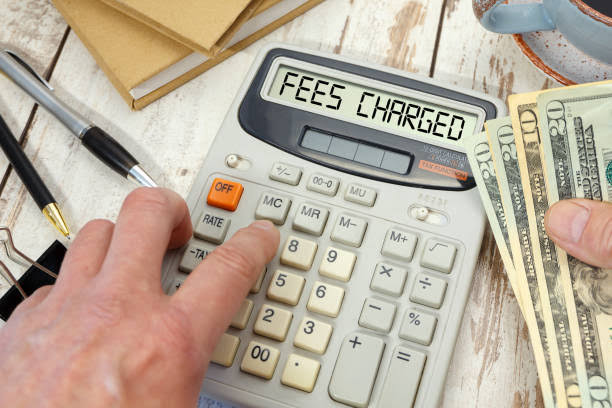

In [1]:
#IMPORTING THE IMAGE FOR BETTER PRESENTATION

from PIL import Image

img = Image.open('CHARGES IMAGE.jpg')
img

In [2]:
#IMPORTING THE LIBRARIES

import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold , cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [3]:
#LOADING THE DATASET

df = pd.read_csv(r"C:\Users\Ritika Kumari\Downloads\insurance.csv")
df.shape

(1338, 7)

# GATHERING INFORMATION ABOUT THE DATASET

In [4]:
#CHECKING THE TOP VALUES OF THE DATAFRAME

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#GETTING THE DISCRIPTION OF THE DATAFRAME

df.describe() 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
#CHECKING THE DATASET

df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [7]:
#GETTING THE INFO. OF THE DATASET

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# HANDLING MISSING VALUE

In [8]:
#CHECKING THE NULL VALUES IN ALL THE COLUMNS

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#FINDING THE SUM OF OVERALL NULL VALUES

df.isnull().sum().sum()

0

<Axes: >

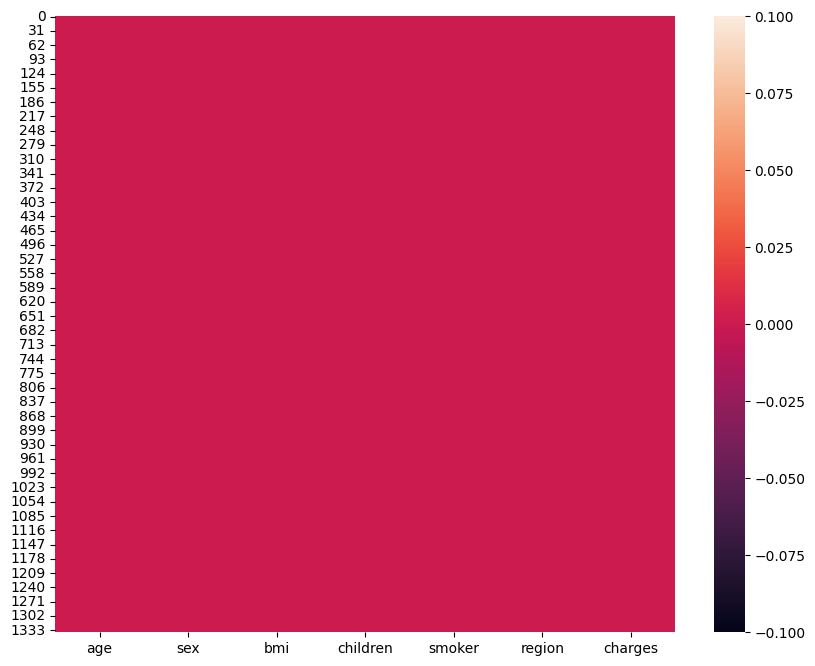

In [10]:
#VISUALISING THE DATAFRAME
#USING HEATMAP

plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

<Axes: >

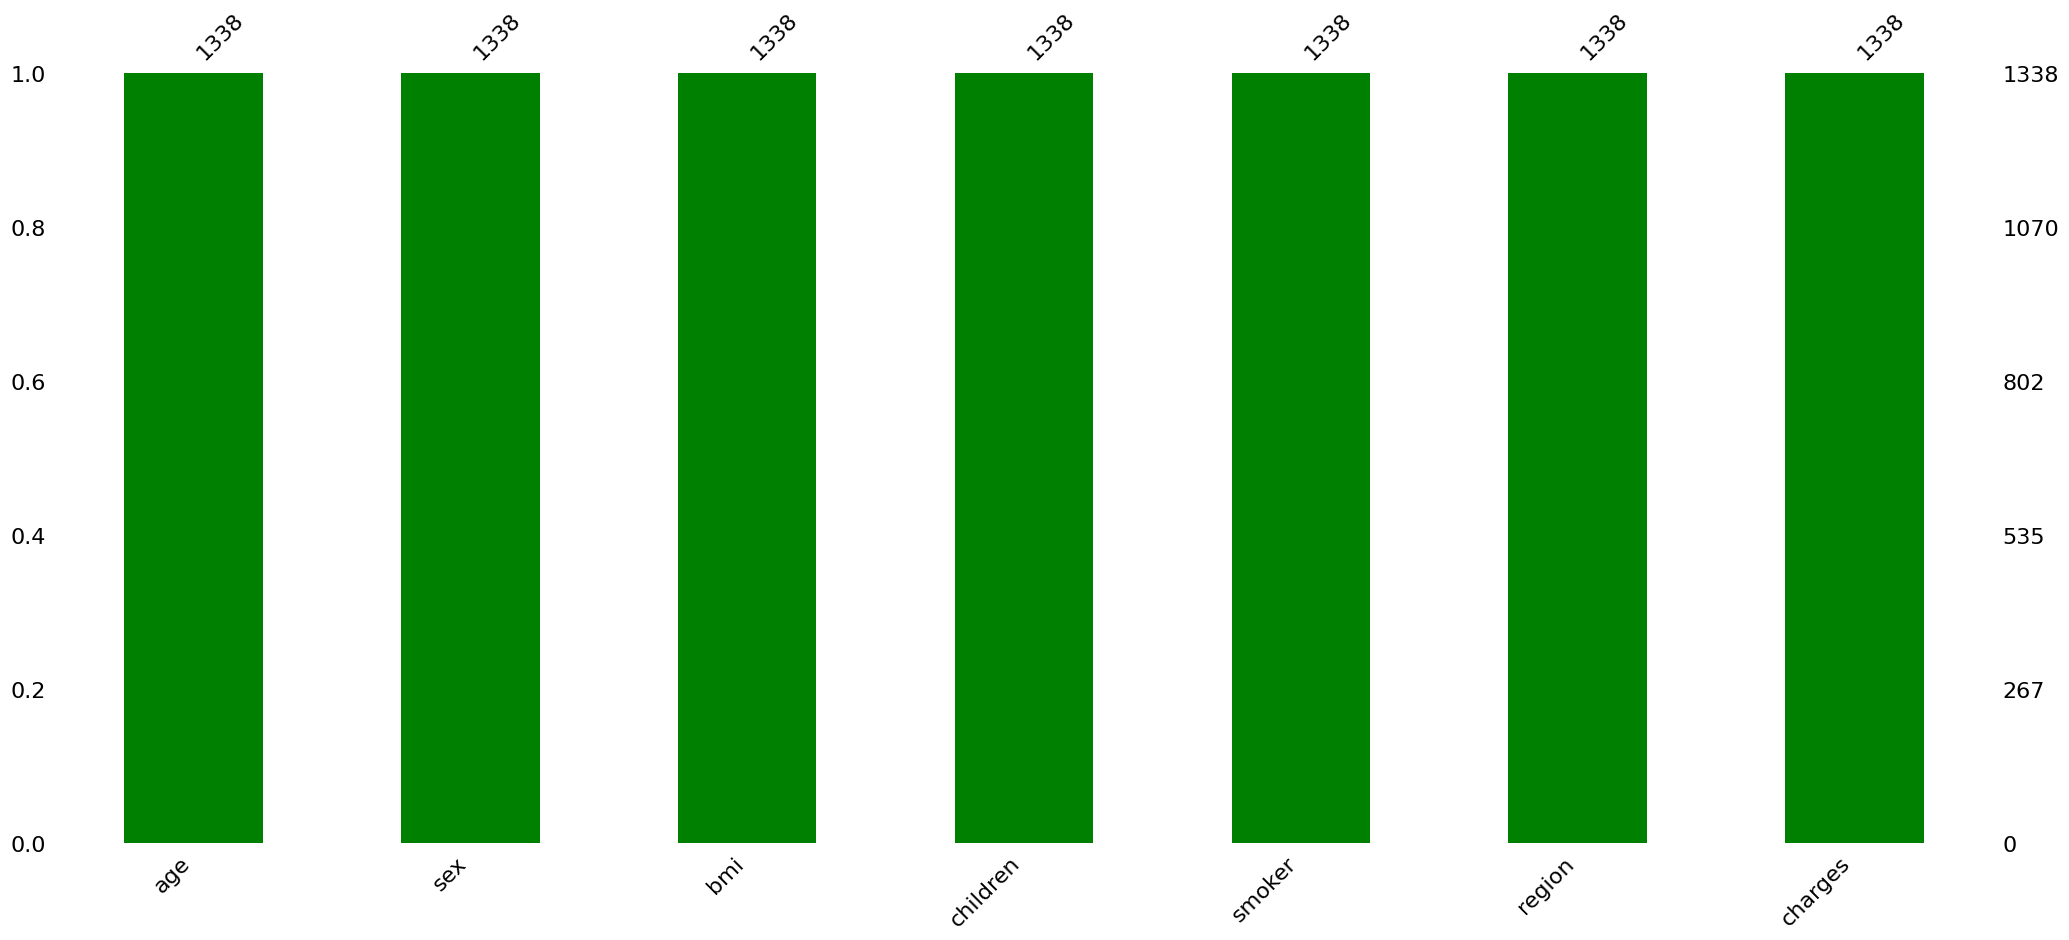

In [11]:
#THIS BARCHART WOULD GIVE US AN IDEA ABOUT HOW MANY MISSING VALUES ARE PRESENT IN EACH COLUMN


msno.bar(df,color='green')

THERE ARE NO MISSING VALUE IN THE DATASET.

In [12]:
 d = df.duplicated()
 d.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [13]:
#SHOWING THE ROW HAVING DUPLICATE VALUES

print(df[d])

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [14]:
#DROPPING THE DUPLICATE VALUES

new_df = df.drop_duplicates()

In [15]:
#CHECKING THE SHAPE

print("Shape of the New Dataset :",new_df.shape)

Shape of the New Dataset : (1337, 7)


WE HAVE DROPPED THE DUPLICATE ROW FROM THE DATASET!!

In [16]:
#CHECKING THE NUMBER OF UNIQUE VALUES IN EACH COLUMN

print("NUMBER OF UNIQUE VALUES IN EACH FEATURE")
print(" ")
new_df.nunique()

NUMBER OF UNIQUE VALUES IN EACH FEATURE
 


age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

# HANDLING OUTLIERS

In [17]:
#GETTING ALL THE NUMERICAL CATEGORIES

num_var = new_df.select_dtypes(include=["int64","float64"]).columns
num_var

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


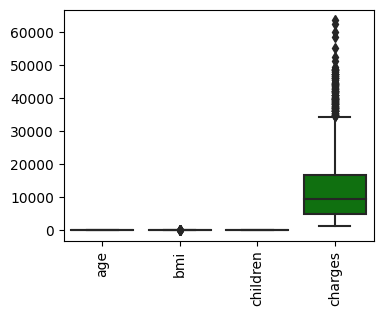

In [18]:
#VISULAZING THE WHOLE DATASET TO SELECT THE TARGET VARIABLES


plt.figure(figsize = (4,3))
sns.boxplot(data = new_df , color = 'green')
plt.xticks(rotation = 90)
plt.show()

C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


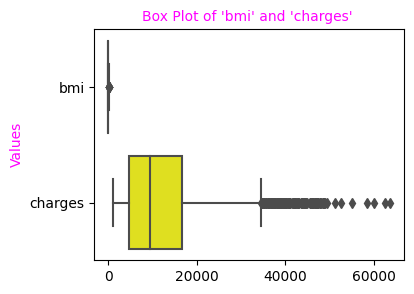

In [19]:
#USING BOXPLOT TO SEE THE OUTLIERS

plt.figure(figsize = (4,3))
sns.boxplot(data = new_df[['bmi' , 'charges']] , orient = 'h'  , color = 'yellow')
plt.title("Box Plot of 'bmi' and 'charges' " , fontsize = 10 , color = 'magenta')
plt.ylabel("Values" , fontsize = 10 , color = 'magenta')
plt.show()


C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<Axes: >

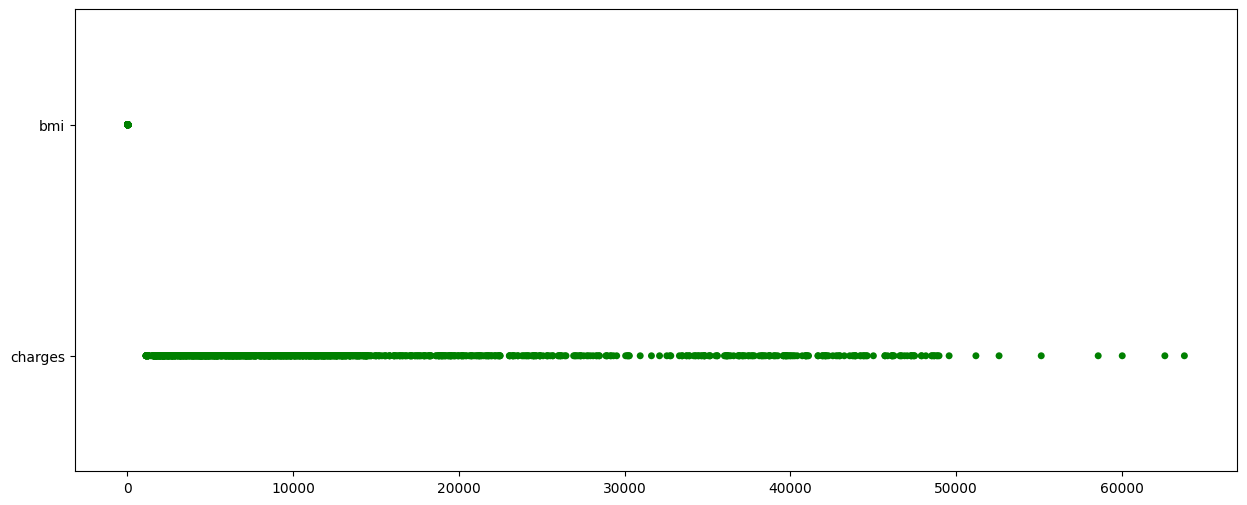

In [20]:
#USING STRIP PLOT TO VISUALISE OUTLIERS

plt.figure(figsize = (15,6))
sns.stripplot(data = new_df[['bmi' , 'charges']] , orient = 'h'  , color = 'green' , jitter = False)

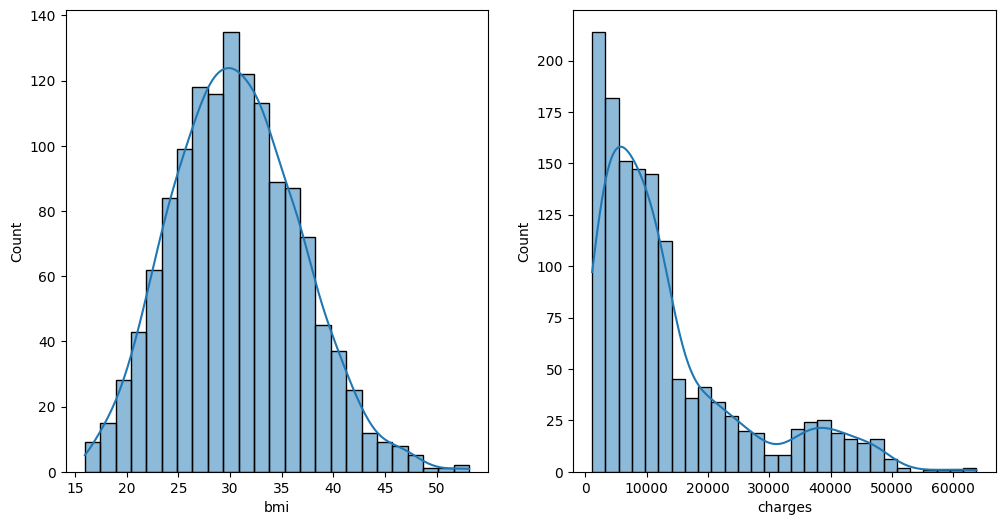

In [21]:
#ANALYSING THE DISTRIBUTION

out_lier = ['bmi' , 'charges']
plt.figure(figsize = (12,6))
for i,var in enumerate(out_lier):
    plt.subplot(1,2,i+1)
    sns.histplot(data = new_df[var] , kde = True)
    

In [22]:
#SORTING THE DATAFRAME


new_df['bmi'] = sorted(new_df['bmi'])
new_df['charges'] = sorted(new_df['charges'])

C:\Users\Ritika Kumari\AppData\Local\Temp\ipykernel_13152\605276214.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['bmi'] = sorted(new_df['bmi'])
C:\Users\Ritika Kumari\AppData\Local\Temp\ipykernel_13152\605276214.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['charges'] = sorted(new_df['charges'])


# IQR

In [23]:
#CALCULATING 1ST , 3RD QUANTILE AND INTERQUANTILE RANGE AND

out_lier = ['bmi' , 'charges']

for i, var in enumerate(out_lier):
    q1 = new_df[var].quantile(0.25)
    q3 = new_df[var].quantile(0.75)
    iqr = q3 - q1
   
    print("--------------------------------------------------")
    print("25th percentile(q1) value of feature ", var,":" ,q1 )
    print("75th percentile(q3) value of feature ", var,":" ,q3 )
    print("IQR of feature ", var,":" ,iqr )
    print("--------------------------------------------------") 

--------------------------------------------------
25th percentile(q1) value of feature  bmi : 26.29
75th percentile(q3) value of feature  bmi : 34.7
IQR of feature  bmi : 8.410000000000004
--------------------------------------------------
--------------------------------------------------
25th percentile(q1) value of feature  charges : 4746.344
75th percentile(q3) value of feature  charges : 16657.71745
IQR of feature  charges : 11911.37345
--------------------------------------------------


In [24]:
#CALCULATING UPPER AND LOWER LIMITS 

out_lier = ['bmi' , 'charges']

def limits(feature,q1,q3,iqr):
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    print("upper limit ( ", feature, " )" , " : ", upper_limit)
    print("lower limit ( ", feature, " )" , " : ", lower_limit)
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    

limits("bmi", 26.29,34.7, 8.410000000000004)
limits("charges", 4746.344, 16657.71745,11911.37345)

upper limit (  bmi  )  :  47.31500000000001
lower limit (  bmi  )  :  13.674999999999994
--------------------------------------------------------
--------------------------------------------------------
upper limit (  charges  )  :  34524.777625
lower limit (  charges  )  :  -13120.716174999998
--------------------------------------------------------
--------------------------------------------------------


In [25]:
#CAPPING - changing the outliers to upper and lower limits


out_lier = ['bmi' , 'charges']
df_cap = new_df.copy()

def cap_out_lier(var,upper_limit,lower_limit):
    df_cap[var]=np.where(
    df_cap[var]>upper_limit,
    upper_limit,
    np.where(
    df_cap[var]<lower_limit,
    lower_limit,
    df_cap[var]))
    


    
cap_out_lier("bmi", 47.31500000000001,13.674999999999994)
cap_out_lier("charges", 34524.777625, -13120.716174999998)

C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


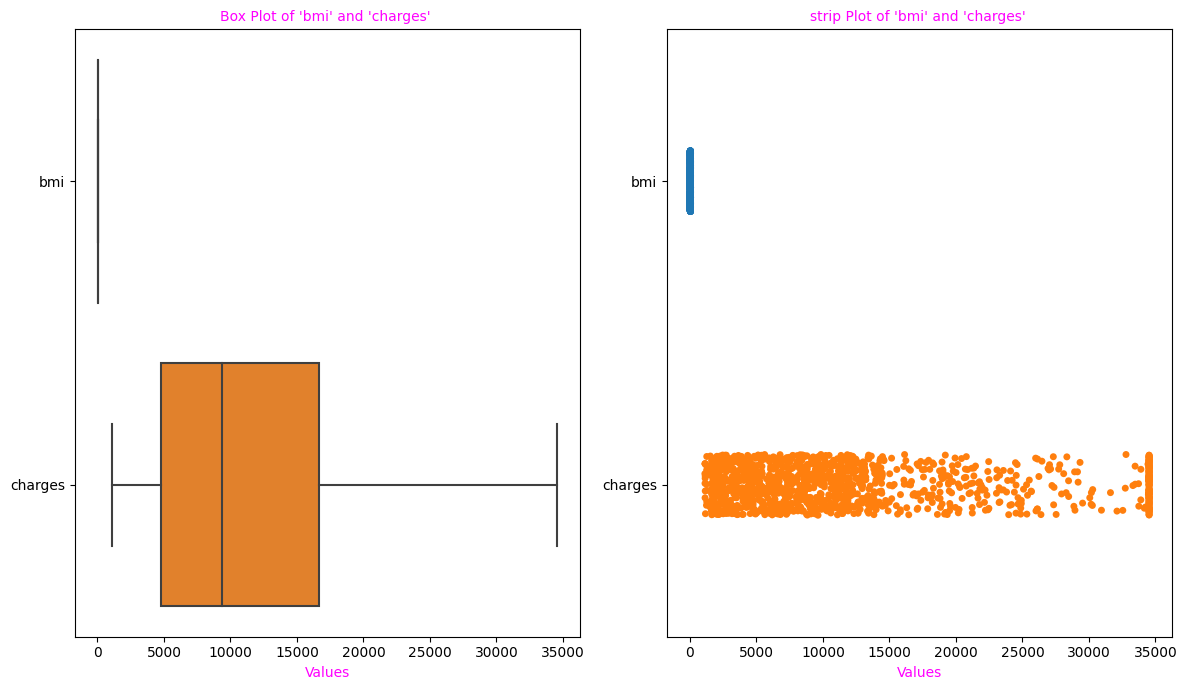

In [26]:
#CHECKING WITH THE HELP OF STRIP PLOT AND BOXPLOT

columns_to_check = ['bmi' , 'charges']
plt.figure(figsize =(12,7))

plt.subplot(1,2,1)
sns.boxplot(data = df_cap[columns_to_check] ,orient = 'h' )
plt.title("Box Plot of 'bmi' and 'charges' " , fontsize = 10 , color = 'magenta')
plt.xlabel("Values" , fontsize = 10 , color = 'magenta')

plt.subplot(1,2,2)
sns.stripplot(data = df_cap[['bmi' , 'charges']] , orient = 'h'  , jitter = True)
plt.title("strip Plot of 'bmi' and 'charges' " , fontsize = 10 , color = 'magenta')
plt.xlabel("Values" , fontsize = 10 , color = 'magenta')

plt.tight_layout()
plt.show()

# FROM THE ABOVE BOXPLOT AND THE STRIP PLOT IT IS QUITE EVIDENT THAT THE OUTLIERS ARE HANDLED SUCCESSFULY!!

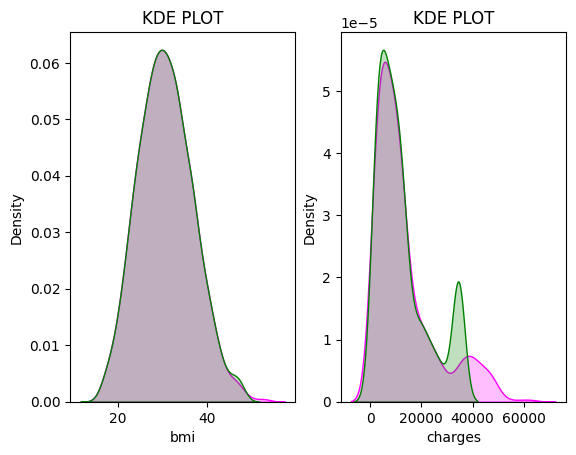

In [27]:
#CHECKING THE DISTRIBUTION BEFORE AND AFTER

out_lier = ['bmi' , 'charges']
for i,var in enumerate(out_lier):
    plt.subplot(1,2,i+1)
    sns.kdeplot(new_df[var],color='magenta',shade = True)
    sns.kdeplot(df_cap[var],color='green',shade = True)
    plt.xlabel(var)
    plt.title('KDE PLOT')

THE DISTRIBUTION OF THE DATA HAS NOT CHANGED MUCH.

# EXPLORATORY DATA ANALYSIS

In [28]:
#CHECKING THE HEAD VALUES

df_cap.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,15.960,0,yes,southwest,1121.8739
1,18,male,16.815,1,no,southeast,1131.5066
2,28,male,16.815,3,no,southeast,1135.9407
3,33,male,17.195,0,no,northwest,1136.3994
4,32,male,17.290,0,no,northwest,1137.0110


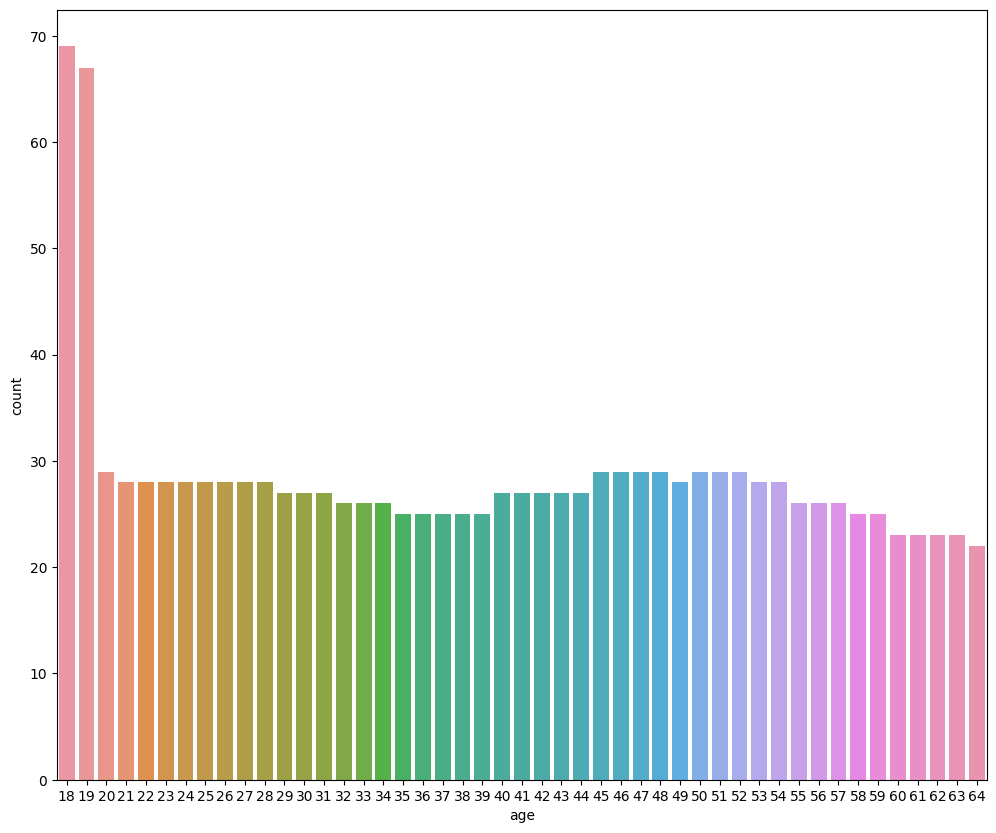

In [29]:
#CHECKING THE WEIGHTAGE OF PEOPLE FROM DIFFERNT AGE GROUP
#USING COUNTPLOT


plt.figure(figsize = (12,10))
sns.countplot(x = 'age' , data = df_cap )
plt.show()

MOST OF THE PEOPLE PAYING THE CHARGES BELONG TO AGE GROUP OF (18 - 19).

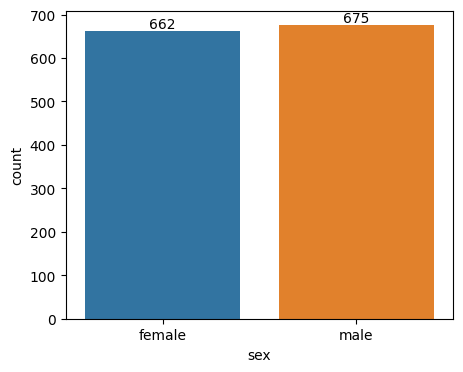

In [30]:
#CHECKING THE COUNT OF MALE AND FEMALE
#USING COUNTPLOT


plt.figure(figsize = (5,4))
ax = sns.countplot(x = 'sex' , data = df_cap )

for bars in ax.containers:
    ax.bar_label(bars)

FROM THE COUNTPLOT IT CAN BE CONCLUDED THAT THE NUMBER OF WOMEN GIVING CHARGES IS ALMOST THE SAME AS MEN.

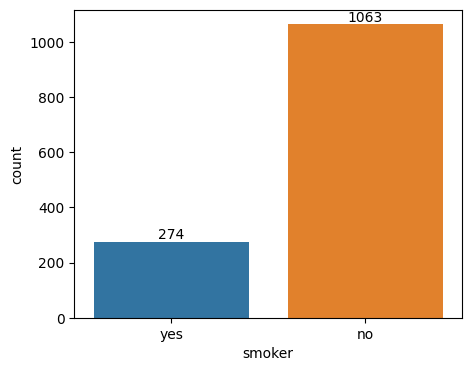

In [31]:
#CHECKING THE WEIGHTAGE OF SMOKERS AND NON SMOKERS
#USING COUNTPLOT


plt.figure(figsize = (5,4))
ax = sns.countplot(x = 'smoker' , data = df_cap )

for bars in ax.containers:
    ax.bar_label(bars)

In [32]:
#FINDING THE PERCENTAGE
per = 274/1063*100
per

25.7761053621825

FROM THE ABOVE TWO CELLS OF CODE WE CAN COME TO THE CONCLUSION THAT THERE ARE VERY LESS NUMBER OF PEOPLE WHO SMOKE.THE PERCENTAGE OF PEOPLE WHO SMOKE IS CLOSE TO 26%.

THERE ARE LESSER NUMBER OF PEOPLE WHO SMOKE AS COMPARED TO THOSE WHO SMOKE

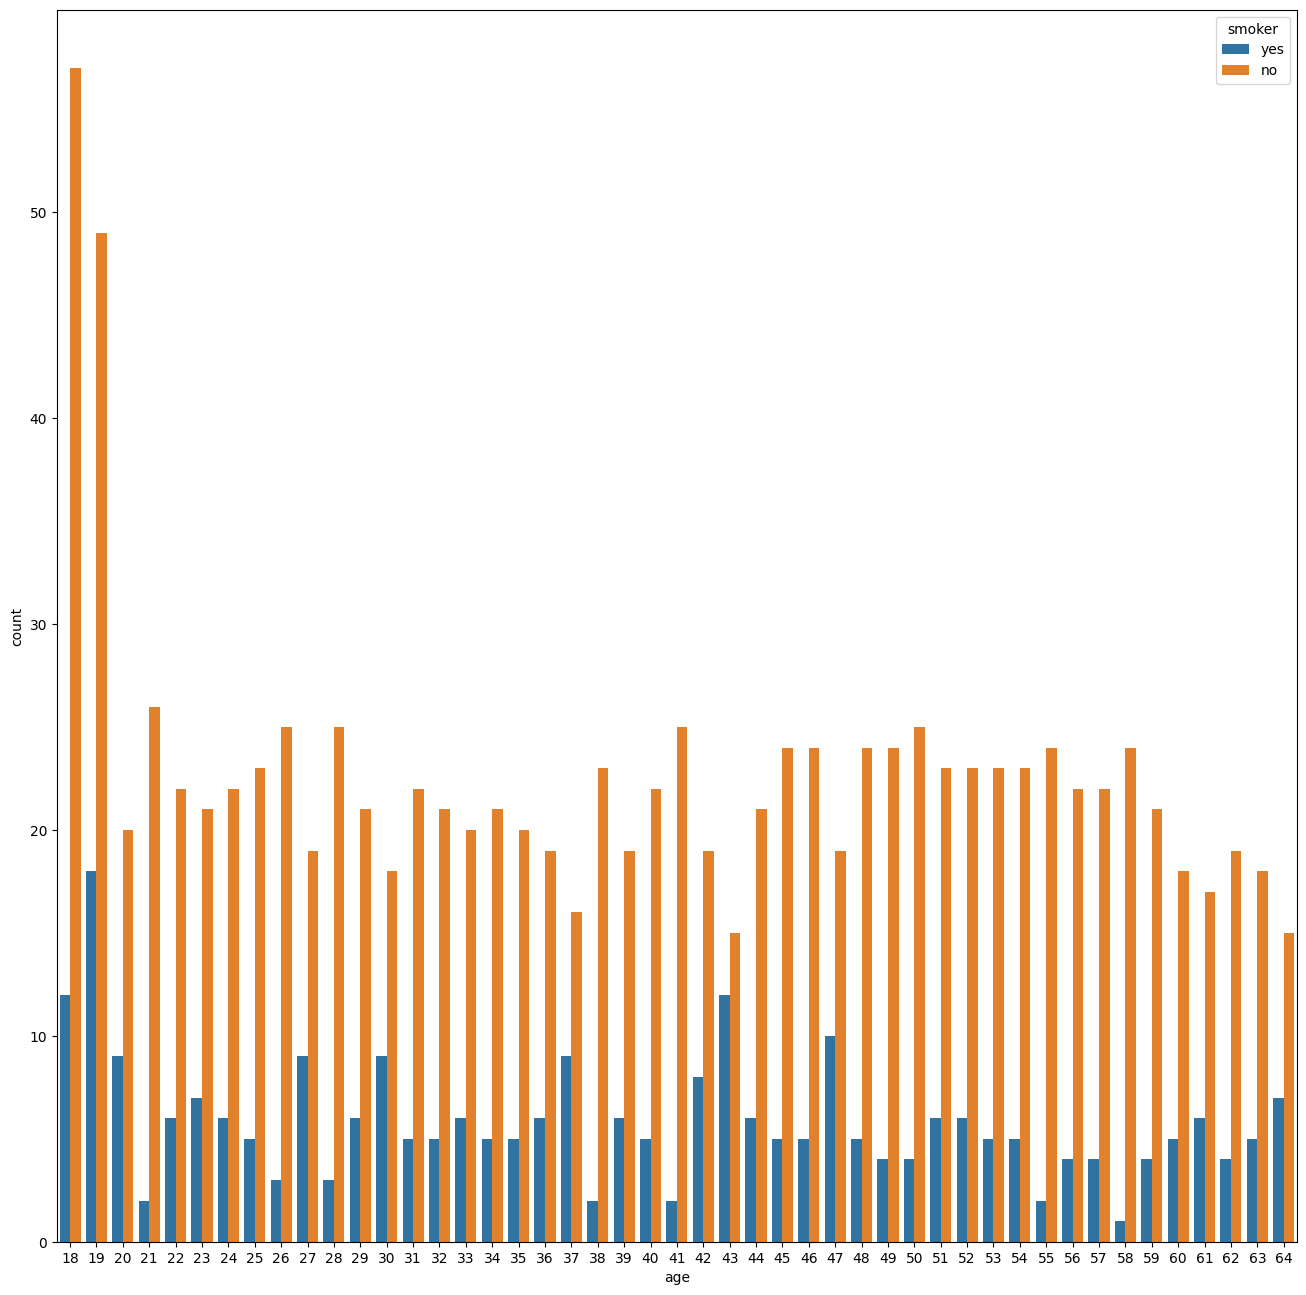

In [33]:
#FINDING THE RELATIONSHIP BETWEEN "SMOKER" AND "AGE" FEATURE

plt.figure(figsize = (16,16))
ax = sns.countplot(x = 'age' , data = df_cap, hue = 'smoker' )



FROM THE ABOVE GRAPH IT IS CLEAR THAT IN EACH AGE GROUP , THE NUMBER OF PEOPLE WHO SMOKE ARE LESS.ALSO,PEOPLE WHO SMOKE THE MOST BELONG TO AGE GROUP OF (18-19)

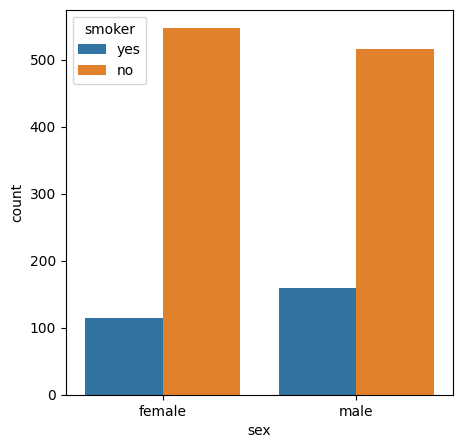

In [34]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = 'sex' , data = df_cap, hue = 'smoker' )

FROM THE ABOVE GRAPH IT CAN BE CONCLUDED THAT MALE SMOKERS ARE GREATER IN NUMBER THAN FEMALE SMOKERS!

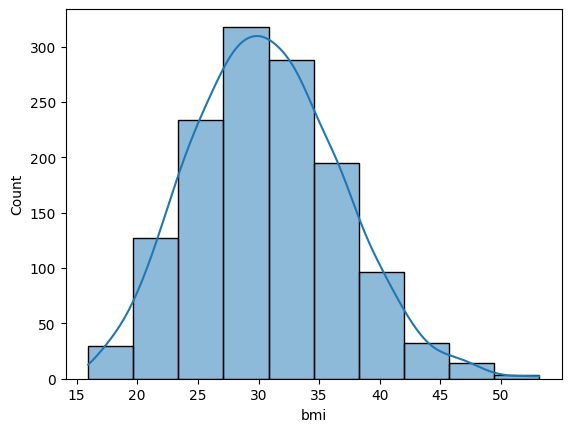

In [35]:
#CHECKING THE DISTRIBUTION OF THE "BMI" FEATURE

sns.histplot(new_df['bmi'] , kde = True , bins=10 , )
plt.show()

THE HISTOGRAM SHOWS THAT BMI OF MOST OF THE PEOPLE IS BETWEEN 25 TO 30.

<Axes: xlabel='children', ylabel='count'>

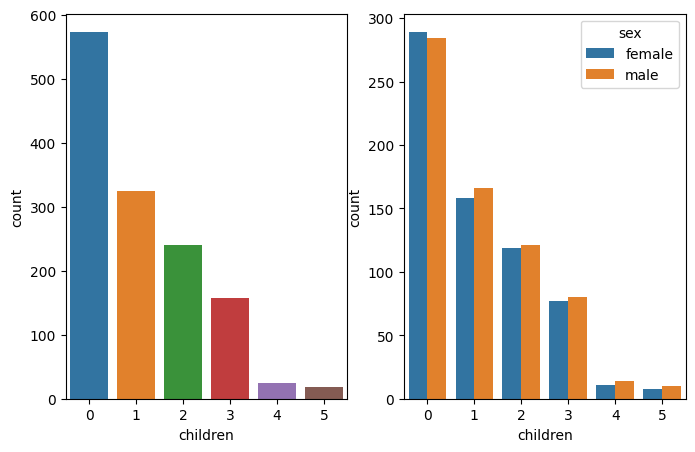

In [36]:
plt.figure(figsize = (8,5))
plt.subplot(1,2,1)
sns.countplot(x = 'children' ,data = df_cap ,)
plt.subplot(1,2,2)
sns.countplot(x = 'children' ,data = df_cap , hue = 'sex')

FROM THE FIRST GRAPH IT IS CLEAR THAT MOST OF THE PEOPLE DONOT HAVE CHILDREN.MOST PEOPLE HAVE 1 CHILD FOLLOWED BY 2,3,4,5.
FROM THE SECOND GRAPH IT CAN BE CONCLUDED THAT MEN HAVE MORE NUMBER OF CHILDREN THAN WOMEN.

In [37]:
df_cap['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

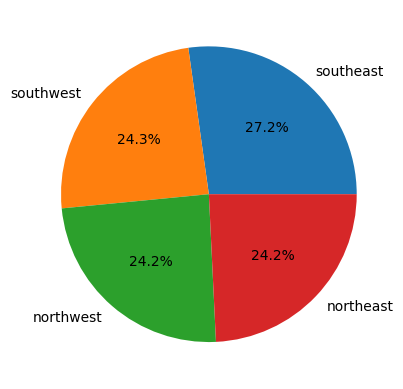

In [38]:
a = [364 , 325 , 324 , 324]
b = ['southeast' , 'southwest' , 'northwest' , 'northeast']
plt.pie(a , labels = b , autopct = "%1.1f%%" )
plt.show()

FROM THE ABOVE GRAPH IT CAN BE CONCLUDED THAT MOST OF THE PEOPLE WHO PAY CHARGES ARE FROM 'southeast' FOLLOWED BY 'southwest'.MOREOVER,THE NUMBER OF PEOPLE BELONGING TO 'northwest' AND 'northeast' IS EXACTLY THE SAME

In [39]:
df_cap.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,15.960,0,yes,southwest,1121.8739
1,18,male,16.815,1,no,southeast,1131.5066
2,28,male,16.815,3,no,southeast,1135.9407
3,33,male,17.195,0,no,northwest,1136.3994
4,32,male,17.290,0,no,northwest,1137.0110


# FINDING PATTERNS BETWEEN INDEPENDENT AND DEPENDENT FEATURES

<Axes: xlabel='charges', ylabel='Count'>

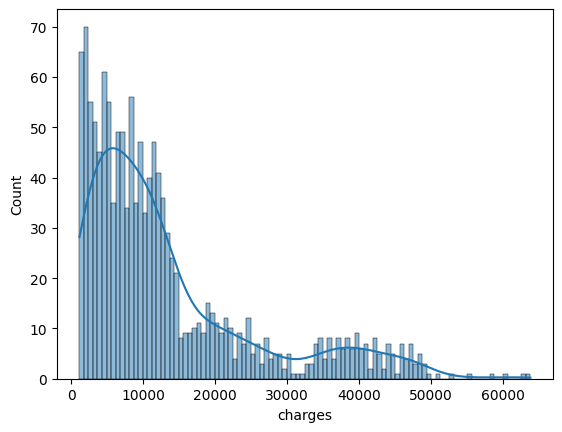

In [40]:
sns.histplot(new_df['charges'] , kde = True , bins=100 , )

In [41]:
new_df['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

MOST NUMBER OF PEOPLE HAVE GIVEN 1337 UNITS OF MONEY.THE AVERAGE OF ALL THE CHARGES COME OUT TO BE 13279.121487 UNITS.

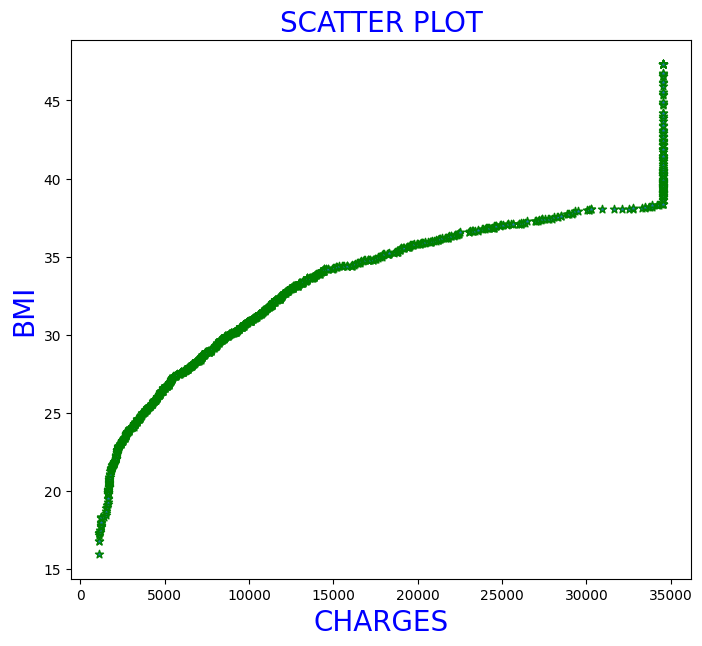

In [42]:
plt.figure(figsize = (8,7))
plt.scatter(df_cap['charges'] , df_cap['bmi'] , marker = '*' , edgecolors= 'g' )
plt.title("SCATTER PLOT" , fontsize = 20 , color = 'blue')
plt.xlabel("CHARGES" ,  fontsize = 20 , color = 'blue')
plt.ylabel("BMI" ,  fontsize = 20 , color = 'blue')
plt.show()

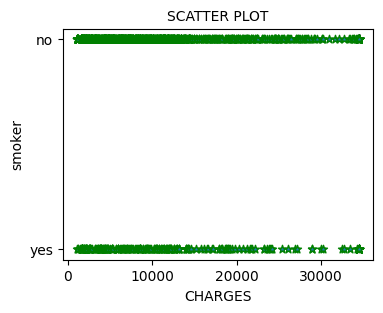

In [43]:
plt.figure(figsize = (4,3))
plt.scatter(df_cap['charges'] , df_cap['smoker'] , marker = '*' , edgecolors= 'g' )
plt.title("SCATTER PLOT" , fontsize = 10 , color = 'k')
plt.xlabel("CHARGES" ,  fontsize = 10 , color = 'k')
plt.ylabel("smoker" ,  fontsize = 10 , color = 'k')
plt.show()

THE AMOUNT OF CHARGE GIVEN BY NON SMOKERS ARE MORE AS COMPARED TO SMOKERS

# ENCODING (CATEGORICAL TO NUMERICAL)

In [44]:
#LISTING OUT THE CATEGORICAL FEATURES


cat_var = df_cap.select_dtypes(include=['O']).keys()
cat_var

Index(['sex', 'smoker', 'region'], dtype='object')

USING ONE HOT ENCODING FOR 'SEX' AND 'SMOKER'.AND WE WILL USE LABEL ENCODING TECHNIQUE FOR 'REGION'

In [45]:
#DROPPING THE REGION FEATURE 
#MAKING NEW DATAFRAME HAVING ONLY REGION FEATURE

new_df = df_cap.drop(columns = 'region')
df = df_cap[['region']]
new_df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,15.960,0,yes,1121.8739
1,18,male,16.815,1,no,1131.5066
2,28,male,16.815,3,no,1135.9407
3,33,male,17.195,0,no,1136.3994
4,32,male,17.290,0,no,1137.0110


In [46]:
#ONE HOT ENCODING THE VARIABLES

new_df = pd.get_dummies(new_df ,  drop_first = True )
new_df.head()

,age,bmi,children,charges,sex_male,smoker_yes
0,19,15.960,0,1121.8739,0,1
1,18,16.815,1,1131.5066,1,0
2,28,16.815,3,1135.9407,1,0
3,33,17.195,0,1136.3994,1,0
4,32,17.290,0,1137.0110,1,0


In [47]:
#LABEL ENCODING THE REGION FEATURE

le = LabelEncoder()
le.fit_transform(df['region'])

array([3, 2, 2, ..., 2, 3, 1])

In [48]:
#CONVERTING THE ARRAY INTO DATAFRAME

df['region_L_enc'] = le.fit_transform(df['region'])
df.head()

C:\Users\Ritika Kumari\AppData\Local\Temp\ipykernel_13152\472465734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region_L_enc'] = le.fit_transform(df['region'])


,region,region_L_enc
0,southwest,3
1,southeast,2
2,southeast,2
3,northwest,1
4,northwest,1


In [49]:
#MERGING THE TWO DATASETS


Merged_df = pd.concat([new_df , df], axis=1)
Merged_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region,region_L_enc
0,19,15.960,0,1121.8739,0,1,southwest,3
1,18,16.815,1,1131.5066,1,0,southeast,2
2,28,16.815,3,1135.9407,1,0,southeast,2
3,33,17.195,0,1136.3994,1,0,northwest,1
4,32,17.290,0,1137.0110,1,0,northwest,1


In [50]:
#DROPPING THE REGION FEAURE

df = Merged_df.drop(columns = 'region')
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_L_enc
0,19,15.960,0,1121.8739,0,1,3
1,18,16.815,1,1131.5066,1,0,2
2,28,16.815,3,1135.9407,1,0,2
3,33,17.195,0,1136.3994,1,0,1
4,32,17.290,0,1137.0110,1,0,1


In [51]:
#CHECKING THE DATATYPES

df.dtypes

age               int64
bmi             float64
children          int64
charges         float64
sex_male          uint8
smoker_yes        uint8
region_L_enc      int32
dtype: object

WE HAVE SUCCESSFULLY DONE ENCODING AS THERE ARE ONLY NUMERICAL VARAIBLES IN THE DATAFRRAME.

# SPLITTING

In [52]:
#SPLITTING INTO X MATRIX AND y VECTOR

X = df.drop(columns=['charges'],axis=1)
y = df[['charges']]

In [53]:
#CHECKING THE FEATURES IN X MATRIX


X.columns.values

array(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_L_enc'],
      dtype=object)

In [54]:
#PRINTING THE SHAPE OF (X-MATRIX) AND (y-VECTOR)

print("shape of X :",X.shape )
print("shape of y :",y.shape )

shape of X : (1337, 6)
shape of y : (1337, 1)


In [55]:
#SPLITTING  THE DATA IN TRAIN AND TEST

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=2)

print('shape of X_train : ', X_train.shape)
print('shape of X_test : ', X_test.shape)
print('shape of y_train : ', y_train.shape)
print('shape of y_test : ', y_test.shape)

shape of X_train :  (1069, 6)
shape of X_test :  (268, 6)
shape of y_train :  (1069, 1)
shape of y_test :  (268, 1)


# FEATURE SELECTION

In [56]:
#GETTING THE CORRELATION MATRIX


cor = X_train.corr()
cor

,age,bmi,children,sex_male,smoker_yes,region_L_enc
age,1.000000,-0.031935,0.028473,0.008051,-0.029789,0.007107
bmi,-0.031935,1.000000,0.036738,0.006425,-0.013753,-0.016273
children,0.028473,0.036738,1.000000,0.009288,0.007343,0.002950
sex_male,0.008051,0.006425,0.009288,1.000000,0.078695,-0.023438
smoker_yes,-0.029789,-0.013753,0.007343,0.078695,1.000000,-0.001574
region_L_enc,0.007107,-0.016273,0.002950,-0.023438,-0.001574,1.000000


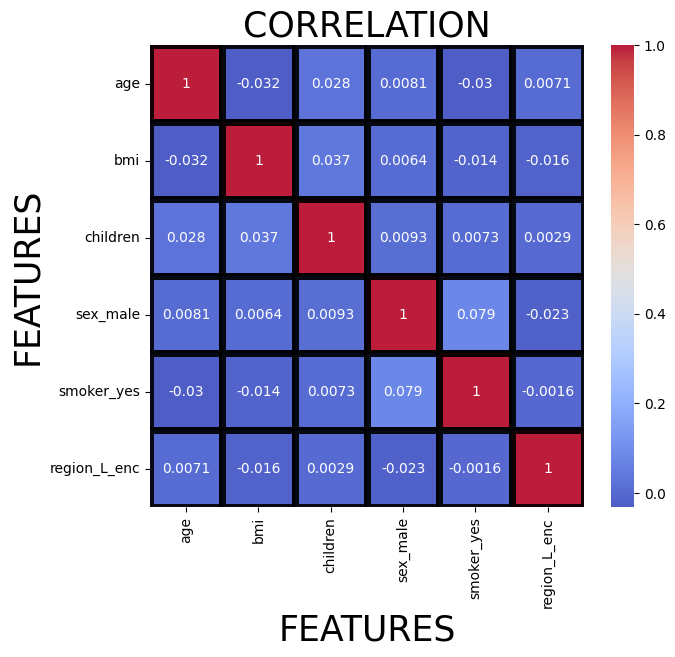

In [57]:
#GETTING THE CORRELATION OF ALL THE FEATURES EXCEPT THE TARGET FEATURE

plt.figure(figsize=(7,6))
sns.heatmap(cor,annot = True,linewidth = 5,linecolor='k',alpha=0.9,cbar_kws={"shrink":1},cmap='coolwarm')
plt.title("CORRELATION",fontsize = 25,color='k')
plt.xlabel("FEATURES",fontsize = 25,color = 'k')
plt.ylabel("FEATURES",fontsize = 25,color = 'k')
plt.show()

In [58]:
#with the following function we can select highly correlated features
# it will remove the first feature that is correlated with any other feature


def correlation(dataset , threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr



drop_feature = correlation(X_train , 0.8)
drop_feature

set()

In [59]:
# determine the mutual information

mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1.88473001e-03, 4.43251584e+00, 0.00000000e+00, 0.00000000e+00,
       2.10658736e-02, 0.00000000e+00])

In [60]:
#GETTING THE MUTUAL INFORMATION
#IN DESCENDING ORDER


mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

bmi             4.432516
smoker_yes      0.021066
age             0.001885
children        0.000000
sex_male        0.000000
region_L_enc    0.000000
dtype: float64

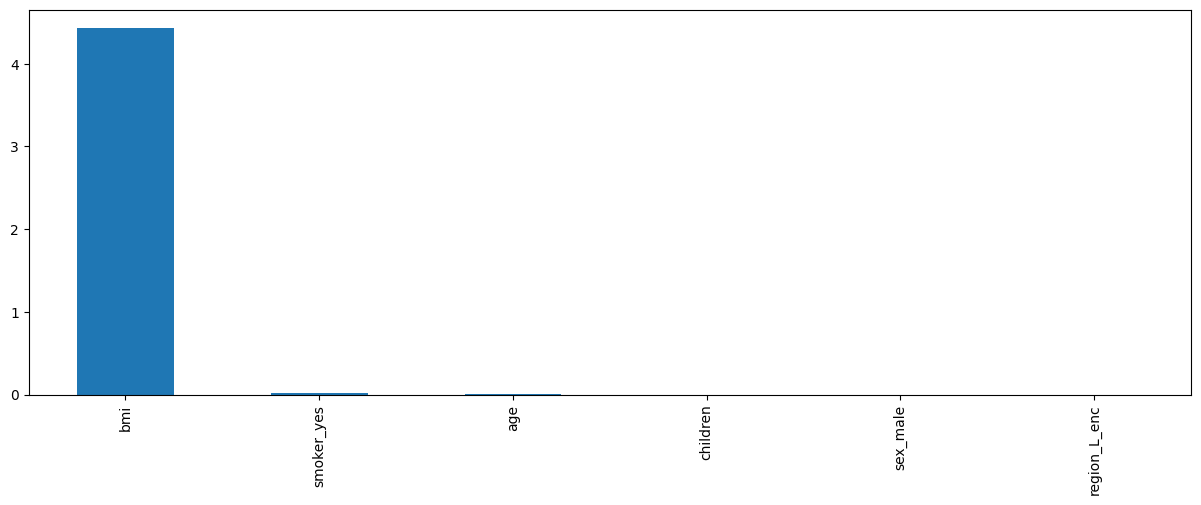

In [61]:
##VISUALISAION WITH THE HELP OF PLOT

mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))
plt.show()

In [62]:
## Selecting the top 20 percentile

selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train, y_train)

C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x00000236B56194C0>)

In [63]:
#DISPLAYING WHETHER THE FEATURE IS SELECTED OR NOT IN THE FORM OF TRUE OR FALSE

selected_top_columns.get_support()

array([False,  True, False, False, False, False])

In [64]:
#DISPLAYING THE NAME OF THE SELECTED FEATURE

X_train.columns[selected_top_columns.get_support()]

Index(['bmi'], dtype='object')

In [65]:
#HACING ONLY THE BMI FEATURE IN THE DATASETS

X_train = X_train[['bmi']]
X_test = X_test[['bmi']]


In [66]:
#CHECKING THE HEAD VALUE
X_train.head()

,bmi
660,30.210
505,28.405
1049,35.530
1099,36.300
201,24.300


In [67]:
#CHECKING THE HEAD VALUE
X_test.head()

,bmi
17,18.335
1091,36.190
273,25.460
270,25.365
874,32.965


# FEATURE SCALING

In [68]:
#CREATING OBJECT

sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [69]:
#TRANSFORMING THE DATASETS

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [70]:
#CONVERTING THE ARRAY INTO DATAFRAME

X_train_sc = pd.DataFrame(X_train_sc,columns = ['bmi'])


X_test_sc = pd.DataFrame(X_test_sc,columns = ['bmi'])

In [71]:
#CHECKING THE DESCRIPTION OF THE DATAFRAME

X_train_sc.describe().round(2)

,bmi
count,1069.00
mean,0.00
std,1.00
min,-2.40
25%,-0.72
50%,-0.05
75%,0.68
max,2.69


WE HAVE PERFORMED FEATURE SCALING SUCCESSFULLY.

In [ ]:
sns.pairplot()

# MODEL TRAINING

MODEL TRAINING MEANS DETERMING GOOD VALUES FOR ALL THE WEIGHTS AND BIAS FROM LABELED EXAMPLES.

# DECISION TREE

In [72]:
##TRAINING THE MODEL


dt = DecisionTreeRegressor(criterion = 'mse')
dt.fit(X_train , y_train)

C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse')

In [73]:
##PRINING THE SCORE 
##CROSS VALIDATING

print("score : " , dt.score(X_test , y_test))
print(" ")
cross_dt = cross_val_score(dt , X_train , y_train , cv=10)
print("cross_validation : " , cross_dt.mean())

score :  0.999884781439617
 
cross_validation :  0.9998815528740133


C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Ritika Kumari\anaconda3\lib

In [74]:
##FINDING MEAN SQUARED ERROR
##FINDING RMSE

y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test , y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
print("mse_dt " , mse_dt)
print("rmse_dt " , rmse_dt)

mse_dt  10563.230813276557
rmse_dt  102.77757933166434


# RANDOM FOREST

In [75]:
##TRAINING THE MODEL

rf = RandomForestRegressor()
rf.fit(X_train , y_train)

C:\Users\Ritika Kumari\AppData\Local\Temp\ipykernel_13152\2490555174.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train , y_train)


RandomForestRegressor()

In [76]:
##PRINING THE SCORE 
##CROSS VALIDATING

print("score" , rf.score(X_test , y_test))
print("-----------------------------------------------")
cross_rf = cross_val_score(rf , X_train , y_train , cv=10)
print("cross_validation" , cross_rf.mean())

score 0.9998892718432304
-----------------------------------------------


C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConvers

cross_validation 0.9998843983034333


In [77]:
##FINDING MEAN SQUARED ERROR
##FINDING RMSE

y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test , y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print("mse_rf " , mse_rf)
print("rmse_rf " , rmse_rf)

mse_rf  10151.55087512153
rmse_rf  100.75490496805368


# K-NEAREST NEIGHBOUR( KNN )

In [78]:
##TRAINING THE MODEL

knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train_sc , y_train)


KNeighborsRegressor(n_neighbors=3)

In [79]:
##PRINING THE SCORE 
##CROSS VALIDATING

print("score : " , knn.score(X_test_sc , y_test ))
cross = cross_val_score(knn , X_train_sc , y_train , cv=10)
print("cross_validation" , cross.mean())

score :  0.9998944369521767
cross_validation 0.9998629452395684


In [80]:
##FINDING MEAN SQUARED ERROR
##FINDING RMSE

y_pred = knn.predict(X_test_sc)
mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mse)
print("mse : " , mse)
print("rmse : " , rmse)

mse :  9678.013991872707
rmse :  98.37689765322297


# SUPPORT VECTOR REGRESSOR







In [81]:
#rbf kernel 
#training the model


svr_rbf = SVR(kernel = 'rbf')
svr_rbf.fit(X_train_sc , y_train)


C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [82]:
##PRINING THE SCORE 
##CROSS VALIDATING

print("score" , svr_rbf.score(X_test_sc , y_test))
cross_sv_rbf = cross_val_score(svr_rbf , X_train_sc , y_train , cv=10)
print("cross_validation" , cross_sv_rbf.mean())

score -0.020700653115289347


C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

cross_validation -0.06774255500888977


In [83]:
##FINDING MEAN SQUARED ERROR
##FINDING RMSE

y_pred = svr_rbf.predict(X_test_sc)
mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mse)
print("mse_dt " , mse)
print("rmse_dt " , rmse)

mse_dt  93577775.61430243
rmse_dt  9673.56064819477


In [84]:
##linear kernel
##MODEL TRAINING

svr_linear = SVR(kernel = 'linear')
svr_linear.fit(X_train_sc , y_train)



C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [85]:
##PRINING THE SCORE 
##CROSS VALIDATING

print("score" , svr_linear.score(X_test_sc , y_test))
cross = cross_val_score(svr_linear , X_train_sc , y_train , cv=10)
print("cross_validation" , cross.mean())

score 0.08561332666327603


C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

cross_validation 0.03631914293927739


C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [86]:
##FINDING MEAN SQUARED ERROR
##FINDING RMSE

y_pred = svr_linear.predict(X_test_sc)
mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mse)
print("mse_dt " , mse)
print("rmse_dt " , rmse)

mse_dt  83830916.22509973
rmse_dt  9155.922467184819


In [87]:
##POLYNOMIAL KERNEL
##MODEL TRAINING

svr_poly = SVR(kernel = 'poly' , degree = 2)
svr_poly.fit(X_train_sc , y_train)

C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(degree=2, kernel='poly')

In [88]:
##PRINING THE SCORE 
##CROSS VALIDATING

print("score" , svr_poly.score(X_test_sc , y_test))
cross = cross_val_score(svr_poly , X_train_sc , y_train , cv=10)
print("cross_validation" , cross.mean())

score -0.05284019135501228


C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

cross_validation -0.09345879211751022


In [89]:
##FINDING MEAN SQUARED ERROR
##FINDING RMSE

y_pred = svr_poly.predict(X_test_sc)
mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mse)
print("mse_dt " , mse)
print("rmse_dt " , rmse)

mse_dt  96524326.58256596
rmse_dt  9824.679464622037


# RIDGE AND LASSO REGRESSION

In [90]:
##RIDGE REGRESSION
##MODEL TRAINING

rd = Ridge()
rd.fit(X_train_sc , y_train)

Ridge()

In [91]:
##PRINING THE SCORE 
##CROSS VALIDATING

print("score" , rd.score(X_test_sc , y_test))
print(" ")
cross = cross_val_score(rd , X_train_sc , y_train , cv=10)
print("cross_validation" , cross.mean())

score 0.8640531138654086
 
cross_validation 0.8778831123035642


In [92]:
##FINDING MEAN SQUARED ERROR
##FINDING RMSE

y_pred = rd.predict(X_test_sc)
mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mse)
print("mse " , mse)
print("rmse " , rmse)

mse  12463602.49436325
rmse  3530.382768817462


# LASSO REGRESSION

In [93]:
##LASSO REGRESSION
##MODEL TRAINING

ls = Lasso()
ls.fit(X_train_sc , y_train)

Lasso()

In [94]:
##PRINING THE SCORE 
##CROSS VALIDATING

print("score" , ls.score(X_test_sc , y_test))
print(" ")
cross = cross_val_score(ls , X_train_sc , y_train , cv=10)
print("cross_validation" , cross.mean())

score 0.8640649076157007
 
cross_validation 0.8778792772554418


In [95]:
##FINDING MEAN SQUARED ERROR
##FINDING RMSE

y_pred = ls.predict(X_test_sc)
mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mse)
print("mse " , mse)
print("rmse " , rmse)

mse  12462521.244032789
rmse  3530.2296304961224


# CONCLUSION : 

WE HAVE USED DIFFERENT MACHINE LEARNING ALGORITHMS LIKE DECISION TREE , RANDOM FOREST , KNN , SVM , RIDGE AND LASSO REGRESSION.ALSO WE CHECKED THE SCORE AND FOR DID MODEL EVALUATION BY CHECKING THE MEAN SQUARED ERROR AND ROOT MEAN SQUARED ERROR.NOW,THE BEST M.L ALGORITHMS OF ALL IS THE ONE HAVING MINIMUM ERROR.HENCE,OUR FINALLY DECIDED ALGORITHM IS KNN.
